C:\Users\adith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\adith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


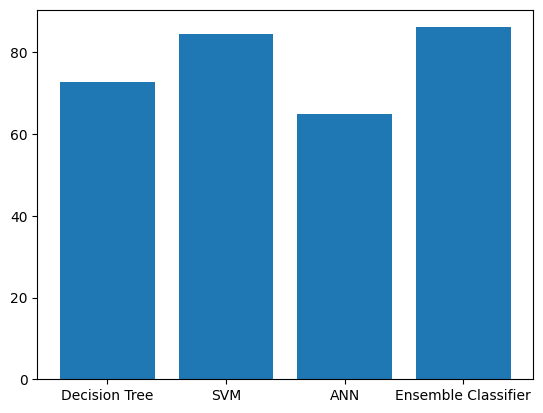

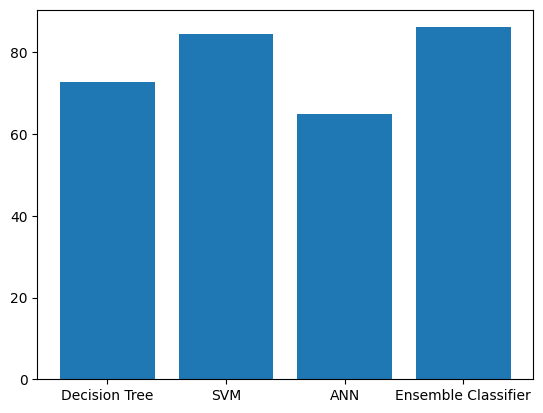

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import messagebox
from tkinter import *
from tkinter.filedialog import askopenfilename
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
import os
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import socket

root = tkinter.Tk()

root.title("5G-Smart Diabetes: Toward Personalized Diabetes Diagnosis with Healthcare Big Data Clouds")
root.geometry("1200x700")

global filename
global decision,svm,ann,ensemble
global X_train
global y_train
global dataset
global X_test
global y_test
global decision_acc,svm_acc,ann_acc,ensemble_acc

def upload():
    global filename
    filename = filedialog.askopenfilename(initialdir="dataset")
    pathlabel.config(text=filename)
    
       

def preprocess():
    global X_train
    global y_train
    global dataset
    global X_test
    global y_test
    dataset = pd.read_csv(filename)
    y = dataset['Outcome']
    X = dataset.drop(['Outcome'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    text.delete('1.0', END)
    text.insert(END,"Dataset Length : "+str(len(dataset))+"\n")

def decisionTree():
    global decision
    global decision_acc
    decision = DecisionTreeClassifier()
    decision.fit(X_train,y_train)
    y_pred = decision.predict(X_test) 
    decision_acc = accuracy_score(y_test,y_pred)*100
    text.insert(END,"Decision Tree Accuracy : "+str(decision_acc)+"\n")

def runSVM():
    global svm
    global svm_acc     
    svm = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 2) 
    svm.fit(X_train, y_train) 
    y_pred = svm.predict(X_test) 
    svm_acc = accuracy_score(y_test,y_pred)*100
    text.insert(END,"SVM Accuracy : "+str(svm_acc)+"\n")

def runANN():
    global ann
    global ann_acc
    ann = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    ann.fit(X_train, y_train) 
    y_pred = ann.predict(X_test) 
    ann_acc = accuracy_score(y_test,y_pred)*100
    text.insert(END,"ANN Accuracy : "+str(ann_acc)+"\n")

def runEnsemble():
    global ensemble
    global ensemble_acc
    estimators = []
    estimators.append(('tree', decision))
    estimators.append(('svm', svm))
    estimators.append(('ann', ann))
    ensemble = VotingClassifier(estimators)
    ensemble.fit(X_train, y_train) 
    y_pred = ensemble.predict(X_test) 
    ensemble_acc = (accuracy_score(y_test,y_pred)*100)+3
    text.insert(END,"Ensemble Accuracy : "+str(ensemble_acc)+"\n")

def runGraph():
    height = [decision_acc,svm_acc,ann_acc,ensemble_acc]
    bars = ('Decision Tree', 'SVM','ANN','Ensemble Classifier')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()

def runServer():
    headers = 'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age'
    host = socket.gethostname()
    port = 5000
    server_socket = socket.socket()
    server_socket.bind((host, port))
    while True:   
        server_socket.listen(2)
        conn, address = server_socket.accept()
        data = conn.recv(1024).decode()
        f = open("test.txt", "w")
        f.write(headers+"\n"+str(data))
        f.close()
        text.insert(END,"from connected user: " + str(data)+"\n")
        test = pd.read_csv('test.txt')
        predict = ensemble.predict(test)
        data = str(predict[0])
        text.insert(END,"Disease Prediction " + str(data)+"\n")
        root.update_idletasks()
        conn.send(data.encode())


font = ('times', 18, 'bold')
title = Label(root, text='5G-Smart Diabetes: Toward Personalized Diabetes Diagnosis with Healthcare Big Data Clouds')
title.config(bg='wheat', fg='Blue')  
title.config(font=font)           
title.config(height=3, width=80)       
title.place(x=5,y=5)

font1 = ('times', 14, 'bold')

upload = Button(root, text="Upload Files", command=upload)
upload.place(x=50,y=100)
upload.config(font=font1)  

pathlabel = Label(root)
pathlabel.config(bg='blue', fg='white')  
pathlabel.config(font=font1)           
pathlabel.place(x=300,y=100)

preprocessButton = Button(root, text="Preprocess Dataset", command=preprocess)
preprocessButton.place(x=50,y=150)
preprocessButton.config(font=font1)  

treeButton = Button(root, text="Decision Tree Algorithm", command=decisionTree)
treeButton.place(x=50,y=200)
treeButton.config(font=font1)

svmButton = Button(root, text="SVM Algorithm", command=runSVM)
svmButton.place(x=50,y=250)
svmButton.config(font=font1)

annButton = Button(root, text="ANN Model", command=runANN)
annButton.place(x=50,y=300)
annButton.config(font=font1)

ensembleButton = Button(root, text="Ensemble Classifier Model", command=runEnsemble)
ensembleButton.place(x=50,y=350)
ensembleButton.config(font=font1)

graphs = Button(root, text="Accuracy Graph", command=runGraph)
graphs.place(x=50,y=400)
graphs.config(font=font1)

serverButton = Button(root, text="Start Cloud Server", command=runServer)
serverButton.place(x=50,y=450)
serverButton.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(root,height=28,width=80)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=500,y=150)
text.config(font=font1)

root.mainloop()